## Count Vectorizer:
Count Vectorizer converts a collection of text documents into a matrix of token counts. Each document is represented by a vector where each element corresponds to the count of a particular word (token) in that document
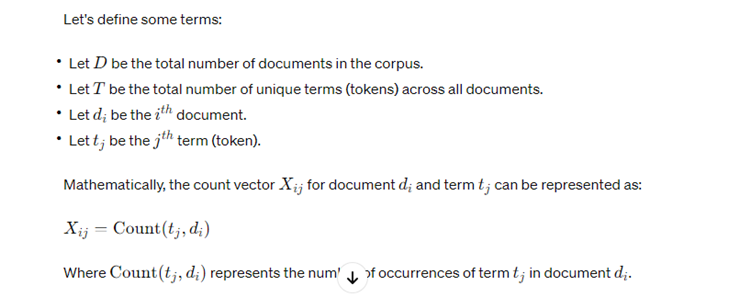

## TF-IDF (Term Frequency-Inverse Document Frequency):
- TF-IDF reflects the importance of a term in a document relative to its frequency in the entire corpus. It combines two components: Term Frequency (TF) and Inverse Document Frequency (IDF).

**Term Frequency (TF)**:
Term frequency is a measure of how often a term appears in a document. It is calculated as the ratio of the number of times a term appears in a document to the total number of terms in that document.

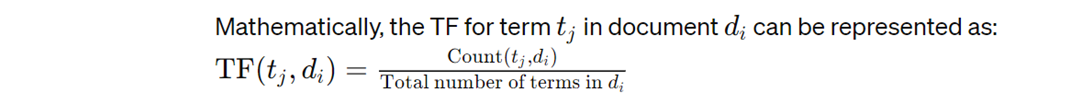

## Inverse Document Frequency 
This measures the rarity of a term across all documents in the corpus. It is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term, with a smoothing term to handle the case when the term doesn't appear in any document.

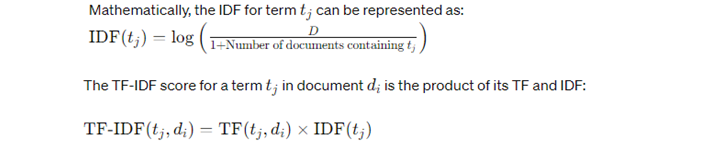
This gives higher weight to terms that are frequent within a document but rare across all documents, effectively highlighting their importance in representing the content of the document.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample text data
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Using CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(corpus)
type(X_count)

scipy.sparse._csr.csr_matrix

In [4]:

print("Count Vectorizer Matrix:")
print(X_count.toarray())  # Convert the sparse matrix to array for better visibility
print("Vocabulary:")
print(count_vectorizer.get_feature_names())
print()

Count Vectorizer Matrix:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Vocabulary:
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']



C:\Users\suyashi144893\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [5]:

# Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

print("TF-IDF Vectorizer Matrix:")
print(X_tfidf.toarray())  # Convert the sparse matrix to array for better visibility
print("Vocabulary:")
print(tfidf_vectorizer.get_feature_names())


TF-IDF Vectorizer Matrix:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
Vocabulary:
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


## Quick Practice: To vectorize these documents using TfidfVectorize
  
Let's consider three sample documents:

- "The cat in the hat"
- "The quick brown fox"
- "The cat and the hat"

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "The cat in the hat",
    "The quick brown fox",
    "The cat and the hat"
]

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert to dense matrix and print
tfidf_dense = tfidf_matrix.todense()
print(tfidf_dense)

# Print feature names (vocabulary)
print(vectorizer.get_feature_names_out())


[[0.         0.         0.40352536 0.         0.40352536 0.53058735
  0.         0.62674687]
 [0.         0.54645401 0.         0.54645401 0.         0.
  0.54645401 0.32274454]
 [0.53058735 0.         0.40352536 0.         0.40352536 0.
  0.         0.62674687]]
['and' 'brown' 'cat' 'fox' 'hat' 'in' 'quick' 'the']


### Multinomial Naive Bayes
MultinomialNB is a probabilistic learning method based on applying Bayes' theorem with strong (naive) independence assumptions between the features. It's particularly suited for classification with discrete features (e.g., word counts for text classification).

The Multinomial Naive Bayes classifier computes the probability of each class given a document, represented by its term frequencies, and assigns the class with the highest posterior probability.

## Naive Bayes Theorem:

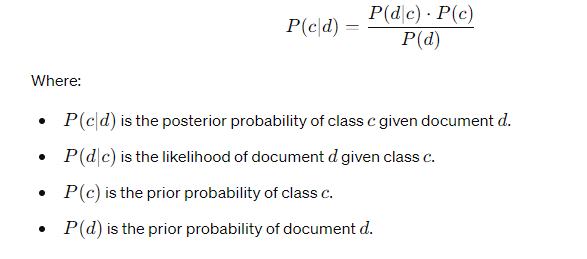

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Sample documents and their corresponding labels
documents = [
    "The cat in the hat",
    "The quick brown fox",
    "The cat and the hat",
    "The quick red fox",
    "A fast brown dog",
    "A quick brown dog"
]
labels = [0, 1, 0, 1, 1, 1]  # 0: Cat-related, 1: Fox/Dog-related

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.3, random_state=42)

# Create a pipeline with TfidfVectorizer and MultinomialNB
model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the model
model.fit(X_train, y_train)

#Note: Due to pipeline we can process TF-IDF and MultinominalNB together. here 1st TF-IDF and then Multinomial

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\om\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\om\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\om\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


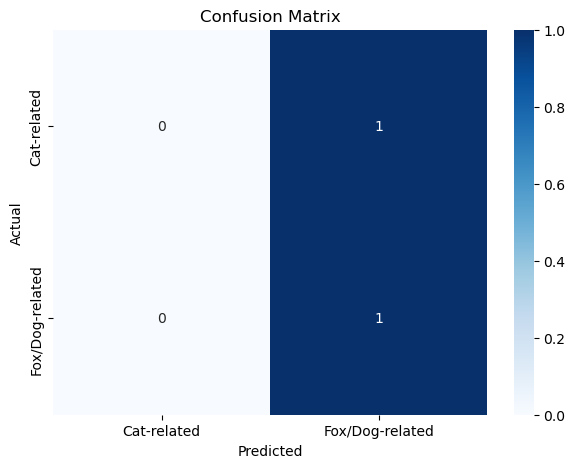

In [5]:
# Predict the test data
predicted = model.predict(X_test)

# Evaluate the classifier
accuracy = metrics.accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.2f}')
print(metrics.classification_report(y_test, predicted))

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, predicted)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat-related', 'Fox/Dog-related'], yticklabels=['Cat-related', 'Fox/Dog-related'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
